In [1]:
!pip install split-folders
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd

import zipfile, os
import splitfolders

from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

In [3]:
od.download('https://www.kaggle.com/datasets/edywinarno/semarang-batik-dataset/data')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: diasti
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/edywinarno/semarang-batik-dataset


100%|██████████| 12.0G/12.0G [02:31<00:00, 85.1MB/s]


In [4]:
base_dir = '/content/semarang-batik-dataset'

splitfolders.ratio(base_dir, output=base_dir, ratio=(0.7, 0.295, 0.005))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

Copying files: 3020 files [01:57, 25.62 files/s]


In [5]:
pd.Series(os.listdir(train_dir))

0            Batik Cap Asem Sinom
1    Batik Cap Gambang Semarangan
2        Batik Cap Kembang Sepatu
3      Batik Cap Warak Beras Utah
4            Batik Cap Asem Warak
5          Batik Cap Blekok Warak
6                Batik Cap Blekok
7             Batik Cap Tugu Muda
8            Batik Cap Asem Arang
9            Batik Cap Semarangan
dtype: object

In [6]:
pd.Series(os.listdir(validation_dir))

0            Batik Cap Asem Sinom
1    Batik Cap Gambang Semarangan
2        Batik Cap Kembang Sepatu
3      Batik Cap Warak Beras Utah
4            Batik Cap Asem Warak
5          Batik Cap Blekok Warak
6                Batik Cap Blekok
7             Batik Cap Tugu Muda
8            Batik Cap Asem Arang
9            Batik Cap Semarangan
dtype: object

In [7]:
img = load_img('/content/semarang-batik-dataset/Batik Cap Asem Arang/asem arang (1).JPG')
img_arr = img_to_array(img)
img_arr.shape

(2449, 2565, 3)

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 2112 images belonging to 10 classes.
Found 885 images belonging to 10 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 254, 254, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 32)      9248      
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
)

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nAkurasi telah mencapai > 95%!")
            self.model.stop_training = True
callbacks = myCallback()

In [13]:
start = time.time()

history = model.fit(
    train_generator,
    steps_per_epoch=35,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2,
    callbacks=[callbacks]
)

stop = time.time()
print(f'Time = {(stop-start)/60} minutes')

Epoch 1/35
35/35 - 810s - loss: 2.0251 - accuracy: 0.2304 - val_loss: 1.3203 - val_accuracy: 0.4078 - 810s/epoch - 23s/step
Epoch 2/35
35/35 - 810s - loss: 1.1703 - accuracy: 0.4964 - val_loss: 0.7176 - val_accuracy: 0.6812 - 810s/epoch - 23s/step
Epoch 3/35
35/35 - 788s - loss: 0.8305 - accuracy: 0.6277 - val_loss: 0.4405 - val_accuracy: 0.7875 - 788s/epoch - 23s/step
Epoch 4/35
35/35 - 725s - loss: 0.5808 - accuracy: 0.7598 - val_loss: 0.3503 - val_accuracy: 0.8500 - 725s/epoch - 21s/step
Epoch 5/35
35/35 - 721s - loss: 0.3481 - accuracy: 0.8607 - val_loss: 0.1308 - val_accuracy: 0.9719 - 721s/epoch - 21s/step
Epoch 6/35
35/35 - 723s - loss: 0.3777 - accuracy: 0.8687 - val_loss: 0.2431 - val_accuracy: 0.9062 - 723s/epoch - 21s/step
Epoch 7/35
35/35 - 722s - loss: 0.2244 - accuracy: 0.9196 - val_loss: 0.0965 - val_accuracy: 0.9594 - 722s/epoch - 21s/step
Epoch 8/35
35/35 - 727s - loss: 0.1457 - accuracy: 0.9554 - val_loss: 0.5071 - val_accuracy: 0.8422 - 727s/epoch - 21s/step
Epoch 9/

In [14]:
# Save the model
model.save('batik_model.h5')
print("Model saved successfully!")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!


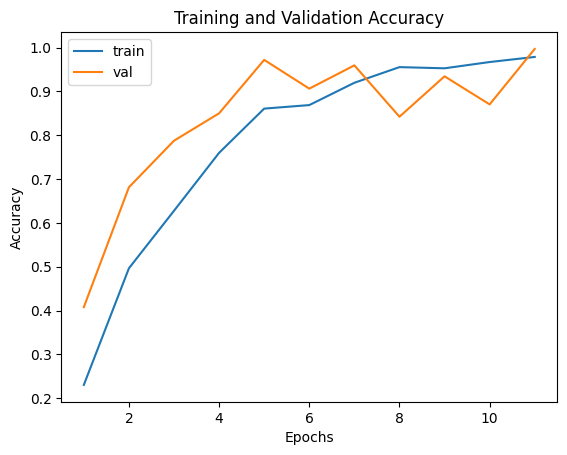

In [15]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, label='train')
plt.plot(epochs, validation_accuracy, label='val')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

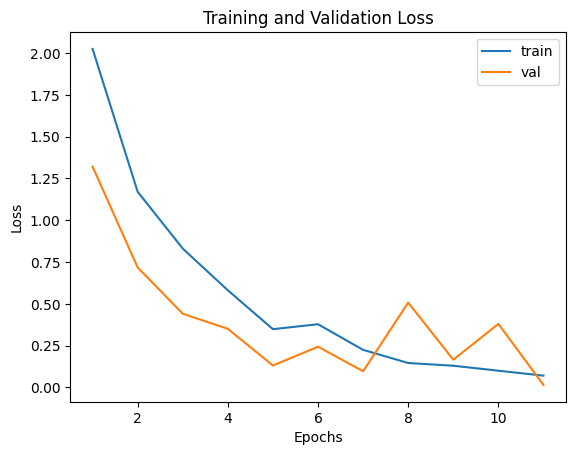

In [16]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, label='train')
plt.plot(epochs, validation_loss, label='val')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 94ms/step


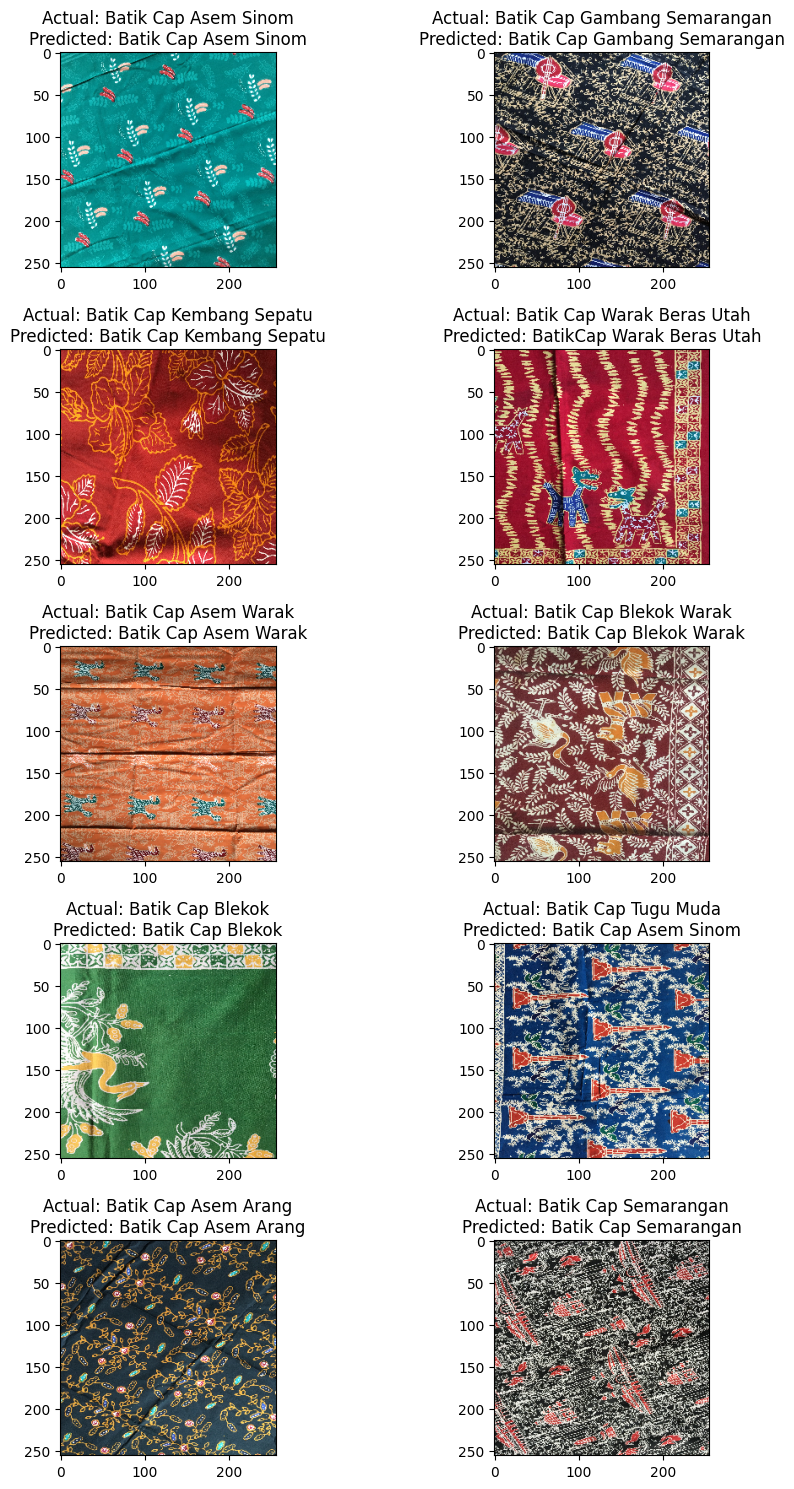

In [25]:
# Path to the test directory
test_dir = '/content/semarang-batik-dataset/test'

# Function to get class name from class index
def get_class_name(label):
    class_names = {
        0: 'Batik Cap Asem Arang',
        1: 'Batik Cap Asem Sinom',
        2: 'Batik Cap Asem Warak',
        3: 'Batik Cap Blekok',
        4: 'Batik Cap Blekok Warak',
        5: 'Batik Cap Gambang Semarangan',
        6: 'Batik Cap Kembang Sepatu',
        7: 'Batik Cap Semarangan',
        8: 'Batik Cap Tugu Muda',
        9: 'BatikCap Warak Beras Utah'
    }
    return class_names[label]

# Load and display images from test directory with predictions
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Iterate through the test directory and display images with predictions
for i, class_name in enumerate(os.listdir(test_dir)):
    if i >= num_rows * num_cols:
        break
    # Determine row and column indices
    row_index = i // num_cols
    col_index = i % num_cols

    # Get a random image from the current class directory
    class_dir = os.path.join(test_dir, class_name)
    img_filename = os.listdir(class_dir)[0]
    img_path = os.path.join(class_dir, img_filename)

    # Load and display the image
    img = image.load_img(img_path, target_size=(256, 256))
    axes[row_index, col_index].imshow(img)
    axes[row_index, col_index].set_title(f'Actual: {class_name}')

    # Make prediction for the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    predicted_classes = model.predict(images, batch_size=10)
    predicted_class_index = np.argmax(predicted_classes)
    predicted_class_label = get_class_name(predicted_class_index)
    axes[row_index, col_index].set_title(f"Actual: {class_name}\nPredicted: {predicted_class_label}")

# Hide unused subplots
for i in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()
